<a href="https://colab.research.google.com/github/milaamir/rec_sys_for_anomalous_behavior/blob/main/%D0%92%D0%9A%D0%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install implicit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 83.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
import implicit
from scipy import sparse
import warnings; warnings.simplefilter('ignore')
import random
from sklearn import metrics
from sklearn.preprocessing import Normalizer
import pickle

/usr/local/lib/python3.10/dist-packages/implicit/gpu/__init__.py:13: UserWarning: CUDA extension is built, but disabling GPU support because of 'Cuda Error: CUDA driver version is insufficient for CUDA runtime version (/project/./implicit/gpu/utils.h:71)'
  warnings.warn(


In [ ]:
import zipfile
import os
import time

from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
zip_file_df = 'drive/MyDrive/VKR/df_12.zip'
zip_file_tf = 'drive/MyDrive/VKR/tf_12.zip'
zip_file_data = 'drive/MyDrive/VKR/train_12.zip'

print(os.listdir())

['.config', 'drive', 'sample_data']


In [ ]:
print(os.listdir("drive/MyDrive/VKR"))

['train_12.csv', 'Untitled0.ipynb', 'tf_12.zip', 'df_12.zip', '6_метрик.ipynb', 'train_12.zip', 'Untitled2.ipynb', 'Untitled1.ipynb', 'Бланк  отзыва.docx', 'ВКР.ipynb']


In [ ]:
with zipfile.ZipFile(zip_file_df, 'r') as zip_ref:
   zip_ref.extractall()

In [ ]:
with zipfile.ZipFile(zip_file_tf, 'r') as zip_ref:
   zip_ref.extractall()

In [ ]:
with zipfile.ZipFile(zip_file_data, 'r') as zip_ref:
   zip_ref.extractall()

In [ ]:
data= pd.read_csv('train_12.csv',index_col=0,low_memory=False)
data

,object.storage.id,object.storage.name,src.ip,subject.account.id,subject.account.domain,event_src.host,src.asset,datafield6,time
0,\\*\w3svc1,u_ex22030722_x.log,10.10.192.57,S-1-5-21-1023191730-727829927-3985050192-32035,ptsecurity.ru,dc1-mail-03.ptsecurity.ru,165dc53b-cd40-0001-0000-0000000007ee,0x120089,2022-03-22T00:45:57Z
1,\\*\w3svc1,u_ex22030723_x.log,10.10.192.57,S-1-5-21-1023191730-727829927-3985050192-32035,ptsecurity.ru,dc1-mail-03.ptsecurity.ru,165dc53b-cd40-0001-0000-0000000007ee,0x120089,2022-03-22T00:45:57Z
2,\\*\w3svc1,u_ex22030806_x.log,10.10.192.57,S-1-5-21-1023191730-727829927-3985050192-32035,ptsecurity.ru,dc1-mail-03.ptsecurity.ru,165dc53b-cd40-0001-0000-0000000007ee,0x120089,2022-03-22T00:45:57Z
3,\\*\w3svc1,u_ex22030809_x.log,10.10.192.57,S-1-5-21-1023191730-727829927-3985050192-32035,ptsecurity.ru,dc1-mail-03.ptsecurity.ru,165dc53b-cd40-0001-0000-0000000007ee,0x120089,2022-03-22T00:45:57Z
4,\\*\w3svc1,u_ex22030810_x.log,10.10.192.57,S-1-5-21-1023191730-727829927-3985050192-32035,ptsecurity.ru,dc1-mail-03.ptsecurity.ru,165dc53b-cd40-0001-0000-0000000007ee,0x120089,2022-03-22T00:45:57Z
...,...,...,...,...,...,...,...,...,...
1919995,\\*\opp,акцепт,10.0.102.29,S-1-5-21-1023191730-727829927-3985050192-18835,ptsecurity.ru,dc2-fs-01.ptsecurity.ru,1457bbaf-9940-0001-0000-000000001019,0x100081,2022-04-07 14:58:07+00:00
1919996,\\*\opp,дуд губернатора самарской области и правительства,10.0.102.29,S-1-5-21-1023191730-727829927-3985050192-18835,ptsecurity.ru,dc2-fs-01.ptsecurity.ru,1457bbaf-9940-0001-0000-000000001019,0x100081,2022-04-07 14:58:07+00:00
1919997,\\*\opp,отгрузка сертификата vm 09.02.22,10.0.102.29,S-1-5-21-1023191730-727829927-3985050192-18835,ptsecurity.ru,dc2-fs-01.ptsecurity.ru,1457bbaf-9940-0001-0000-000000001019,0x100081,2022-04-07 14:58:07+00:00
1919998,\\*\opp,гау ит-парк,10.0.102.29,S-1-5-21-1023191730-727829927-3985050192-18835,ptsecurity.ru,dc2-fs-01.ptsecurity.ru,1457bbaf-9940-0001-0000-000000001019,0x100081,2022-04-07 14:58:07+00:00


In [ ]:
data['time'] = pd.to_datetime(data['time'])
data["dp"] = pd.to_datetime(data['time'],unit='s').apply(lambda x: "Day" if x.hour >= 10 and x.hour <= 18 else 'Morning'  if x.hour>=6 and x.hour<=10 else 'Evening'  if x.hour>=18 and x.hour<=22 else "Night")
data=data.drop(columns=['time'])
data

,object.storage.id,object.storage.name,src.ip,subject.account.id,subject.account.domain,event_src.host,src.asset,datafield6,dp
0,\\*\w3svc1,u_ex22030722_x.log,10.10.192.57,S-1-5-21-1023191730-727829927-3985050192-32035,ptsecurity.ru,dc1-mail-03.ptsecurity.ru,165dc53b-cd40-0001-0000-0000000007ee,0x120089,Night
1,\\*\w3svc1,u_ex22030723_x.log,10.10.192.57,S-1-5-21-1023191730-727829927-3985050192-32035,ptsecurity.ru,dc1-mail-03.ptsecurity.ru,165dc53b-cd40-0001-0000-0000000007ee,0x120089,Night
2,\\*\w3svc1,u_ex22030806_x.log,10.10.192.57,S-1-5-21-1023191730-727829927-3985050192-32035,ptsecurity.ru,dc1-mail-03.ptsecurity.ru,165dc53b-cd40-0001-0000-0000000007ee,0x120089,Night
3,\\*\w3svc1,u_ex22030809_x.log,10.10.192.57,S-1-5-21-1023191730-727829927-3985050192-32035,ptsecurity.ru,dc1-mail-03.ptsecurity.ru,165dc53b-cd40-0001-0000-0000000007ee,0x120089,Night
4,\\*\w3svc1,u_ex22030810_x.log,10.10.192.57,S-1-5-21-1023191730-727829927-3985050192-32035,ptsecurity.ru,dc1-mail-03.ptsecurity.ru,165dc53b-cd40-0001-0000-0000000007ee,0x120089,Night
...,...,...,...,...,...,...,...,...,...
1919995,\\*\opp,акцепт,10.0.102.29,S-1-5-21-1023191730-727829927-3985050192-18835,ptsecurity.ru,dc2-fs-01.ptsecurity.ru,1457bbaf-9940-0001-0000-000000001019,0x100081,Day
1919996,\\*\opp,дуд губернатора самарской области и правительства,10.0.102.29,S-1-5-21-1023191730-727829927-3985050192-18835,ptsecurity.ru,dc2-fs-01.ptsecurity.ru,1457bbaf-9940-0001-0000-000000001019,0x100081,Day
1919997,\\*\opp,отгрузка сертификата vm 09.02.22,10.0.102.29,S-1-5-21-1023191730-727829927-3985050192-18835,ptsecurity.ru,dc2-fs-01.ptsecurity.ru,1457bbaf-9940-0001-0000-000000001019,0x100081,Day
1919998,\\*\opp,гау ит-парк,10.0.102.29,S-1-5-21-1023191730-727829927-3985050192-18835,ptsecurity.ru,dc2-fs-01.ptsecurity.ru,1457bbaf-9940-0001-0000-000000001019,0x100081,Day


In [ ]:
import plotly.express as px

In [ ]:
data['dp'].value_counts()

Day        1919984
Night       982109
Morning       2159
Name: dp, dtype: int64

<Axes: >

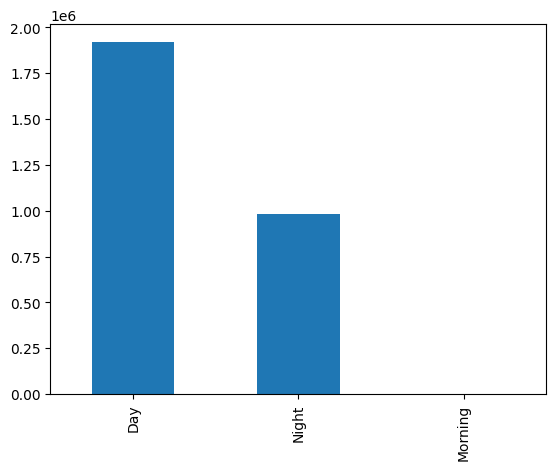

In [ ]:
timess = data['dp'].value_counts().head(50)

timess.plot.bar()

In [ ]:
len(data['subject.account.id'].unique ())

1506

In [ ]:
len(data['src.asset'].unique())

1235

In [ ]:
df1= pd.read_csv('df_12.csv',index_col=0,low_memory=False)
df1

,object.storage.id,object.storage.name,src.ip,subject.account.id,subject.account.domain,event_src.host,src.asset,datafield6,time
Unnamed: 0,,,,,,,,,
117781,NaN,NaN,10.10.52.126,S-1-5-21-1023191730-727829927-3985050192-40269,ptsecurity.ru,dc1-tfs-at-01.build.ptsecurity.ru,1452d867-9840-0001-0000-00000000069b,Network,2022-03-16T04:31:04Z
90057,\\*\imap4,imap4be2022040410-1.log,10.10.192.57,S-1-5-21-1023191730-727829927-3985050192-32035,ptsecurity.ru,dc1-mail-02.ptsecurity.ru,165dc53b-cd40-0001-0000-0000000007ee,0x80,2022-04-07 12:24:40+00:00
76079,NaN,NaN,NaN,S-1-5-21-1023191730-727829927-3985050192-32023,ptsecurity.ru,dc2-bkp-mgmt-01.ptsecurity.ru,NaN,NewCredentials,2022-03-16T02:58:16Z
1864275,\\*\w3svc1,u_ex220309_x.log,10.10.192.57,S-1-5-21-1023191730-727829927-3985050192-32035,ptsecurity.ru,dc1-spw-02.ptsecurity.ru,165dc53b-cd40-0001-0000-0000000007ee,0x80,2022-04-07 14:10:00+00:00
99438,\\*\W3SVC1,u_ex22031017_x.log,10.10.192.57,S-1-5-21-1023191730-727829927-3985050192-32035,ptsecurity.ru,dc1-mail-01.ptsecurity.ru,165dc53b-cd40-0001-0000-0000000007ee,0x120089,2022-03-18T00:32:37Z
...,...,...,...,...,...,...,...,...,...
708481,\\*\imap4,imap4be2022040709-1.log,10.10.192.57,S-1-5-21-1023191730-727829927-3985050192-32035,ptsecurity.ru,dc1-mail-02.ptsecurity.ru,165dc53b-cd40-0001-0000-0000000007ee,0x80,2022-04-07 12:09:08+00:00
1372073,\\*\imap4,imap42022032514-1.log,10.10.192.57,S-1-5-21-1023191730-727829927-3985050192-32035,ptsecurity.ru,dc1-mail-02.ptsecurity.ru,165dc53b-cd40-0001-0000-0000000007ee,0x80,2022-04-07 14:27:11+00:00
1244827,\\*\opp,цебит,10.0.102.29,S-1-5-21-1023191730-727829927-3985050192-18835,ptsecurity.ru,dc2-fs-01.ptsecurity.ru,1457bbaf-9940-0001-0000-000000001019,0x100081,2022-04-07 14:55:54+00:00


In [ ]:
len(data['src.asset'].unique())

1235

In [ ]:
df1['src.asset'].value_counts()

165dc53b-cd40-0001-0000-0000000007ee    1771036
1452db12-bbc0-0001-0000-000000000c34      31423
1457bbaf-9940-0001-0000-000000001019      26887
1601e3d7-6600-0001-0000-00000000015c      24076
1457bbfe-f380-0001-0000-000000001469      22615
                                         ...   
1457bc07-65c0-0001-0000-000000001491          1
156fc7f4-5880-0001-0000-000000000322          1
15dd0f8e-2780-0001-0000-000000000ac6          1
1547f557-ce40-0001-0000-000000000847          1
165c1c78-3bc0-0001-0000-00000000079b          1
Name: src.asset, Length: 1218, dtype: int64

<Axes: >

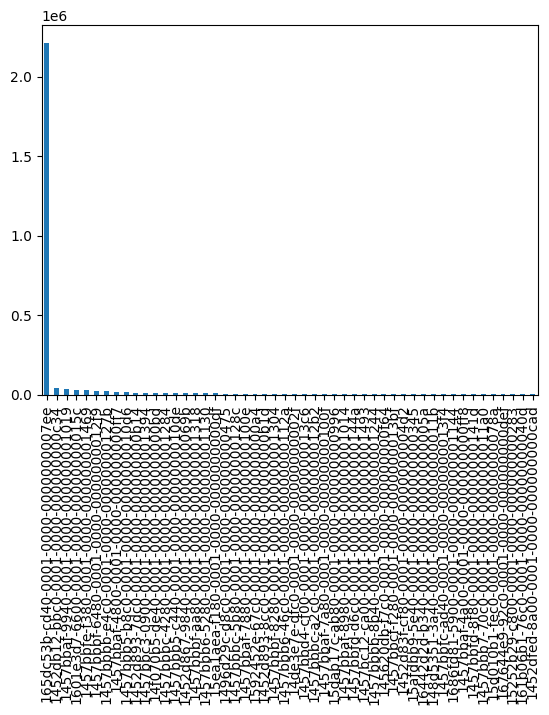

In [ ]:
assets = data['src.asset'].value_counts().head(50)
assets.plot.bar()

In [ ]:
df1['event_src.host'].value_counts()

dc1-spw-02.ptsecurity.ru         319194
dc1-mail-03.ptsecurity.ru        201579
dc1-mail-01.ptsecurity.ru        201126
dc1-prn-01.ptsecurity.ru         125404
dc1-fs-01.ptsecurity.ru          123503
                                  ...  
manfinogenov-nb.ptsecurity.ru         1
esitnikova-nb.ptsecurity.ru           1
azhdanova-nb.ptsecurity.ru            1
tmsk-fs-02.ptsecurity.ru              1
obilovod-nb.ptsecurity.ru             1
Name: event_src.host, Length: 932, dtype: int64

In [ ]:
data['object.storage.id'].unique()

array(['\\\\*\\w3svc1', '\\\\*\\w3svc2', '\\\\*\\ipc$', '\\\\*\\imap4',
       '\\\\*\\security development', '\\\\*\\exchange',
       '\\\\*\\userdata', '\\\\*\\bugs', '\\\\*\\radius.adapter.logs',
       '\\\\*\\dhcp', '\\\\*\\selfservice.portal.logs',
       '\\\\*\\analytics_29352d48-e534-4a42-9f08-1c496aecb08f',
       '\\\\*\\regjournal',
       '\\\\*\\analytics_471b55b2-489d-4ba7-8cd1-a251292ee09a',
       '\\\\*\\w3svc5', '\\\\*\\w3svc4', '\\\\*\\pt', '\\\\*\\w3svc3',
       '\\\\*\\w3svc34578', '\\\\*\\office', '\\\\*\\qlikshare',
       '\\\\*\\accounting',
       '\\\\*\\analytics_56a3fcaf-5771-446d-8106-c75bdf1a9bf0',
       '\\\\*\\consultant', '\\\\*\\w3svc34577', '\\\\*\\W3SVC1',
       '\\\\*\\Imap4', '\\\\*\\W3SVC2', '\\\\*\\IPC$',
       '\\\\*\\Radius.Adapter.Logs', '\\\\*\\W3SVC34577', '\\\\*\\PT',
       '\\\\*\\Office', '\\\\*\\regJournal', '\\\\*\\Distrib',
       '\\\\*\\Analytics_56a3fcaf-5771-446d-8106-c75bdf1a9bf0',
       '\\\\*\\UserData',
       '\\\\*\\

<Axes: >

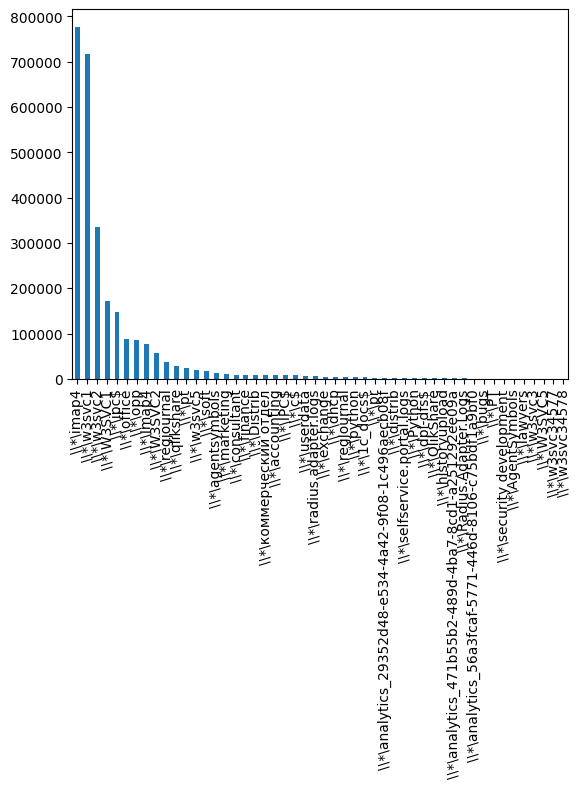

In [ ]:
hosts = data['object.storage.id'].value_counts().head(50)
hosts.plot.bar()

In [ ]:
len(data['event_src.host'].unique())

936

In [ ]:
data['event_src.host'].value_counts()

dc1-spw-02.ptsecurity.ru      399031
dc1-mail-03.ptsecurity.ru     252035
dc1-mail-01.ptsecurity.ru     251530
dc1-prn-01.ptsecurity.ru      156942
dc1-fs-01.ptsecurity.ru       154278
                               ...  
bridge.ptsecurity.ru               1
sshamov.ptsecurity.ru              1
azhdanova-nb.ptsecurity.ru         1
dc2-share-01.ptsecurity.ru         1
ailichev-nb.ptsecurity.ru          1
Name: event_src.host, Length: 936, dtype: int64

<Axes: >

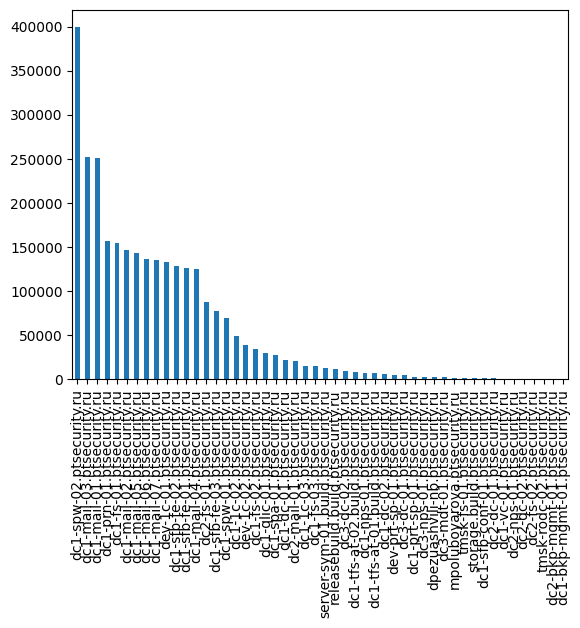

In [ ]:
hosts = data['event_src.host'].value_counts().head(50)
hosts.plot.bar()

In [ ]:
df=pd.read_csv('df_12.csv',usecols = ['subject.account.id','src.asset'], engine="pyarrow")
df

,subject.account.id,src.asset
0,S-1-5-21-1023191730-727829927-3985050192-40269,1452d867-9840-0001-0000-00000000069b
1,S-1-5-21-1023191730-727829927-3985050192-32035,165dc53b-cd40-0001-0000-0000000007ee
2,S-1-5-21-1023191730-727829927-3985050192-32023,
3,S-1-5-21-1023191730-727829927-3985050192-32035,165dc53b-cd40-0001-0000-0000000007ee
4,S-1-5-21-1023191730-727829927-3985050192-32035,165dc53b-cd40-0001-0000-0000000007ee
...,...,...
2323396,S-1-5-21-1023191730-727829927-3985050192-32035,165dc53b-cd40-0001-0000-0000000007ee
2323397,S-1-5-21-1023191730-727829927-3985050192-32035,165dc53b-cd40-0001-0000-0000000007ee
2323398,S-1-5-21-1023191730-727829927-3985050192-18835,1457bbaf-9940-0001-0000-000000001019
2323399,S-1-5-21-1023191730-727829927-3985050192-40453,14f070b5-de40-0001-0000-0000000000bd


In [ ]:
len(df['subject.account.id'].unique ())

1496

In [ ]:
df=df.replace('', np.nan, regex=True)
df=df.fillna('un')

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
tf1=pd.read_csv('tf_12.csv', engine="pyarrow")
tf1

,Unnamed: 0,object.storage.id,object.storage.name,src.ip,subject.account.id,subject.account.domain,event_src.host,src.asset,datafield6,time
0,1187158,\\*\office,внд,10.0.99.56,S-1-5-21-1023191730-727829927-3985050192-22786,ptsecurity.ru,dc1-fs-01.ptsecurity.ru,1457bbb5-c440-0001-0000-0000000010de,0x100081,2022-04-07 14:06:01+00:00
1,134522,\\*\w3svc2,u_ex211206_x.log,10.10.192.57,S-1-5-21-1023191730-727829927-3985050192-32035,ptsecurity.ru,dc1-spw-01.ptsecurity.ru,165dc53b-cd40-0001-0000-0000000007ee,0x120089,2022-03-28 00:34:20+00:00
2,367478,\\*\ipc$,spoolss,10.31.4.149,S-1-5-21-1023191730-727829927-3985050192-40118,ptsecurity.ru,dc1-prn-01.ptsecurity.ru,1457bbff-21c0-0001-0000-00000000147a,0x12019f,2022-04-07 13:34:17+00:00
3,120618,\\*\W3SVC1,u_ex210523_x.log,10.10.192.57,S-1-5-21-1023191730-727829927-3985050192-32035,ptsecurity.ru,dc1-sfb-fe-02.ptsecurity.ru,165dc53b-cd40-0001-0000-0000000007ee,0x120089,2022-03-18 00:36:14+00:00
4,55246,\\*\W3SVC1,u_ex210820_x.log,10.10.192.57,S-1-5-21-1023191730-727829927-3985050192-32035,ptsecurity.ru,dc1-spw-01.ptsecurity.ru,165dc53b-cd40-0001-0000-0000000007ee,0x120089,2022-03-18 00:09:45+00:00
...,...,...,...,...,...,...,...,...,...,...
580846,1647896,\\*\imap4,imap4be2022032600-1.log,10.10.192.57,S-1-5-21-1023191730-727829927-3985050192-32035,ptsecurity.ru,dc1-mail-03.ptsecurity.ru,165dc53b-cd40-0001-0000-0000000007ee,0x80,2022-04-07 13:01:17+00:00
580847,278346,\\*\opp,уралсвязьинформ,10.0.102.42,S-1-5-21-1023191730-727829927-3985050192-27189,ptsecurity.ru,dc2-fs-01.ptsecurity.ru,1457bbb5-b8c0-0001-0000-0000000010d6,0x80,2022-04-07 13:05:38+00:00
580848,315788,\\*\imap4,imap4be2022032820-1.log,10.10.192.57,S-1-5-21-1023191730-727829927-3985050192-32035,ptsecurity.ru,dc1-mail-02.ptsecurity.ru,165dc53b-cd40-0001-0000-0000000007ee,0x80,2022-04-07 13:16:43+00:00
580849,601356,\\*\w3svc1,u_ex211207_x.log,10.10.192.57,S-1-5-21-1023191730-727829927-3985050192-32035,ptsecurity.ru,dc1-sfb-fe-02.ptsecurity.ru,165dc53b-cd40-0001-0000-0000000007ee,0x120089,2022-04-07 14:27:45+00:00


In [ ]:
tf=pd.read_csv('tf_12.csv',usecols = ['subject.account.id','src.asset'], engine="pyarrow")
tf

,subject.account.id,src.asset
0,S-1-5-21-1023191730-727829927-3985050192-22786,1457bbb5-c440-0001-0000-0000000010de
1,S-1-5-21-1023191730-727829927-3985050192-32035,165dc53b-cd40-0001-0000-0000000007ee
2,S-1-5-21-1023191730-727829927-3985050192-40118,1457bbff-21c0-0001-0000-00000000147a
3,S-1-5-21-1023191730-727829927-3985050192-32035,165dc53b-cd40-0001-0000-0000000007ee
4,S-1-5-21-1023191730-727829927-3985050192-32035,165dc53b-cd40-0001-0000-0000000007ee
...,...,...
580846,S-1-5-21-1023191730-727829927-3985050192-32035,165dc53b-cd40-0001-0000-0000000007ee
580847,S-1-5-21-1023191730-727829927-3985050192-27189,1457bbb5-b8c0-0001-0000-0000000010d6
580848,S-1-5-21-1023191730-727829927-3985050192-32035,165dc53b-cd40-0001-0000-0000000007ee
580849,S-1-5-21-1023191730-727829927-3985050192-32035,165dc53b-cd40-0001-0000-0000000007ee


In [ ]:
len(tf['subject.account.id'].unique ())

1386

In [ ]:
for_rec_df=df
vectorizer = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)
encoded_df = pd.DataFrame(vectorizer.fit_transform(for_rec_df))
encoded_df.columns = ['uid','iid']
encoded_df.info()
encoded_df['quantity'] = 1
grouped_purchased = encoded_df.groupby(['uid','iid']).sum().reset_index()
grouped_purchased

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2323401 entries, 0 to 2323400
Data columns (total 2 columns):
 #   Column  Dtype  
---  ------  -----  
 0   uid     float64
 1   iid     float64
dtypes: float64(2)
memory usage: 35.5 MB


,uid,iid,quantity
0,0.0,1218.0,9038
1,1.0,1218.0,16
2,2.0,1218.0,107
3,3.0,1218.0,1
4,4.0,403.0,1
...,...,...,...
5660,1491.0,1218.0,1
5661,1492.0,1218.0,2
5662,1493.0,1218.0,7
5663,1494.0,1218.0,2


array([[<Axes: title={'center': 'uid'}>, <Axes: title={'center': 'iid'}>],
       [<Axes: title={'center': 'quantity'}>, <Axes: >]], dtype=object)

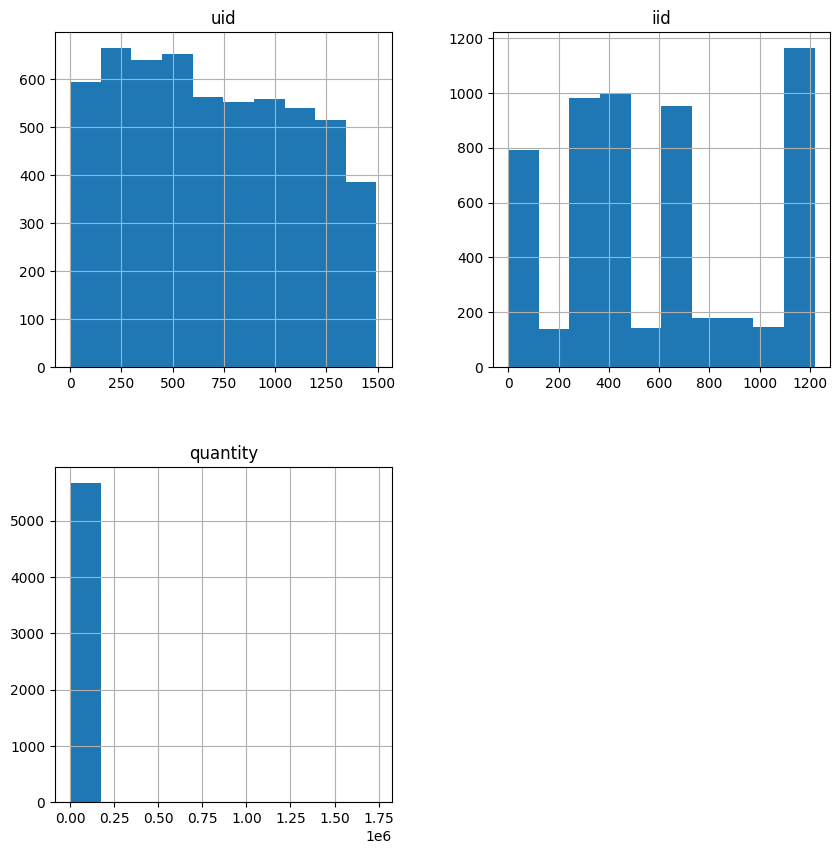

In [ ]:
grouped_purchased.hist(figsize=(10, 10))

In [ ]:
df_sns = grouped_purchased[['uid','quantity']]. copy ()

In [ ]:
customers = list(np.sort(grouped_purchased.uid.unique())) # Get our unique customers
products = list(grouped_purchased.iid.unique()) # Get our unique products that were purchased
quantity = list(grouped_purchased.quantity) # All of our purchases

rows = grouped_purchased.uid.astype('category').cat.codes
# Get the associated row indices
cols = grouped_purchased.iid.astype('category').cat.codes
# Get the associated column indices
apps_runs_sparse = sparse.csr_matrix((quantity, (rows,cols)), shape=( len(customers),len(products)))

In [ ]:
print(apps_runs_sparse)

  (0, 1218)	9038
  (1, 1218)	16
  (2, 1218)	107
  (3, 1218)	1
  (4, 403)	1
  (4, 661)	1
  (5, 343)	2
  (5, 344)	1
  (5, 403)	2
  (5, 661)	1
  (5, 1111)	1
  (6, 343)	1
  (6, 474)	1
  (6, 660)	1
  (7, 20)	59
  (7, 145)	582
  (7, 403)	1
  (7, 474)	1
  (7, 661)	1
  (7, 1111)	3
  (7, 1218)	1
  (8, 20)	68
  (8, 59)	378
  (8, 343)	1
  (8, 474)	1
  :	:
  (1474, 978)	1
  (1474, 980)	9
  (1474, 1162)	2
  (1474, 1218)	3
  (1475, 1218)	1
  (1476, 1218)	1
  (1477, 1218)	1119
  (1478, 1218)	1
  (1479, 1218)	1
  (1480, 1218)	2
  (1481, 1218)	41
  (1482, 1218)	1
  (1483, 1218)	1
  (1484, 1218)	7
  (1485, 1218)	12
  (1486, 1218)	2
  (1487, 1218)	4
  (1488, 1218)	1
  (1489, 1218)	19
  (1490, 1218)	22
  (1491, 1218)	1
  (1492, 1218)	2
  (1493, 1218)	7
  (1494, 1218)	2
  (1495, 1218)	1


In [ ]:
apps_runs_sparse

<1496x1219 sparse matrix of type '<class 'numpy.int64'>'
	with 5665 stored elements in Compressed Sparse Row format>

In [ ]:
matrix_size = apps_runs_sparse.shape[0]*apps_runs_sparse.shape[1] # Number of possible interactions in the matrix
num_purchases = len(apps_runs_sparse.nonzero()[0]) # Number of items interacted with
sparsity = 100*(1 - (num_purchases/matrix_size))


print(1 - (num_purchases/matrix_size))

0.9968935482314337


In [ ]:
def get_app_by_id(id):
    return vectorizer.categories_[1][id]

def get_id_by_appname(name):
    return np.where(vectorizer.categories_[1]==name)[0][0]

def get_id_by_username(name):
    return np.where(vectorizer.categories_[0]==name)[0][0]

def get_score(user, appname, matrix):
    userid = get_id_by_username(user)
    app_id = get_id_by_appname(appname)
    return model.rank_items(userid,apps_runs_sparse,[app_id])

def get(userid, app_id, matrix):

    return model.rank_items(userid,apps_runs_sparse,[app_id])

def get_similar_apps(app_name,n):
    app_id = get_id_by_appname(app_name)
    model_results = [tuple(x for x in row) for row in model.similar_items(app_id,n)]

    print(type(model_results))
    print(model_results)
    output = [(get_app_by_id(int(x[0])),x[1]) for x in model_results]
    return output

# Model


In [ ]:
model =implicit.als.AlternatingLeastSquares(factors=50)

In [ ]:
%%time
model.fit(apps_runs_sparse)

  0%|          | 0/15 [00:00<?, ?it/s]

CPU times: user 2.84 s, sys: 3.23 s, total: 6.06 s
Wall time: 3.46 s


In [ ]:
pickle.dump(model,open('model_rec.pkl','wb'))

In [ ]:
with open('model_rec.pkl','wb') as file:
    pickle.dump(model, file)

In [ ]:
with open('model_rec.pkl', 'rb') as f:
	md = pickle.load(f)

In [ ]:
md

# Test

In [ ]:
tf['score']=0
tf

,subject.account.id,src.asset,score
0,S-1-5-21-1023191730-727829927-3985050192-22786,1457bbb5-c440-0001-0000-0000000010de,0
1,S-1-5-21-1023191730-727829927-3985050192-32035,165dc53b-cd40-0001-0000-0000000007ee,0
2,S-1-5-21-1023191730-727829927-3985050192-40118,1457bbff-21c0-0001-0000-00000000147a,0
11,S-1-5-21-1023191730-727829927-3985050192-3408,1457bbaf-7880-0001-0000-00000000100e,0
13,S-1-5-21-1023191730-727829927-3985050192-36261,1457bbbb-e4c0-0001-0000-00000000127b,0
...,...,...,...
577611,S-1-5-21-1023191730-727829927-3985050192-24126,1457bbbf-d6c0-0001-0000-000000001326,0
577700,S-1-5-21-1023191730-727829927-3985050192-27031,147656e1-9fc0-0001-0000-000000000005,0
579689,S-1-5-21-1023191730-727829927-3985050192-40333,1640c896-e1c0-0001-0000-000000000023,0
579989,S-1-5-21-1023191730-727829927-3985050192-46656,16531e52-8580-0001-0000-0000000004b4,0


In [ ]:
tf=tf.drop_duplicates()
tf

,subject.account.id,src.asset,score
0,S-1-5-21-1023191730-727829927-3985050192-22786,1457bbb5-c440-0001-0000-0000000010de,0
1,S-1-5-21-1023191730-727829927-3985050192-32035,165dc53b-cd40-0001-0000-0000000007ee,0
2,S-1-5-21-1023191730-727829927-3985050192-40118,1457bbff-21c0-0001-0000-00000000147a,0
11,S-1-5-21-1023191730-727829927-3985050192-3408,1457bbaf-7880-0001-0000-00000000100e,0
13,S-1-5-21-1023191730-727829927-3985050192-36261,1457bbbb-e4c0-0001-0000-00000000127b,0
...,...,...,...
577700,S-1-5-21-1023191730-727829927-3985050192-27031,147656e1-9fc0-0001-0000-000000000005,0
579283,S-1-5-21-1023191730-727829927-3985050192-45857,,0
579689,S-1-5-21-1023191730-727829927-3985050192-40333,1640c896-e1c0-0001-0000-000000000023,0
579989,S-1-5-21-1023191730-727829927-3985050192-46656,16531e52-8580-0001-0000-0000000004b4,0


In [ ]:
tf=tf.replace('', np.nan, regex=True)
tf=tf.dropna()
tf

,subject.account.id,src.asset,score
0,S-1-5-21-1023191730-727829927-3985050192-22786,1457bbb5-c440-0001-0000-0000000010de,0
1,S-1-5-21-1023191730-727829927-3985050192-32035,165dc53b-cd40-0001-0000-0000000007ee,0
2,S-1-5-21-1023191730-727829927-3985050192-40118,1457bbff-21c0-0001-0000-00000000147a,0
11,S-1-5-21-1023191730-727829927-3985050192-3408,1457bbaf-7880-0001-0000-00000000100e,0
13,S-1-5-21-1023191730-727829927-3985050192-36261,1457bbbb-e4c0-0001-0000-00000000127b,0
...,...,...,...
577611,S-1-5-21-1023191730-727829927-3985050192-24126,1457bbbf-d6c0-0001-0000-000000001326,0
577700,S-1-5-21-1023191730-727829927-3985050192-27031,147656e1-9fc0-0001-0000-000000000005,0
579689,S-1-5-21-1023191730-727829927-3985050192-40333,1640c896-e1c0-0001-0000-000000000023,0
579989,S-1-5-21-1023191730-727829927-3985050192-46656,16531e52-8580-0001-0000-0000000004b4,0


In [ ]:
u=df['subject.account.id'].drop_duplicates()
u=u.to_list()
h=df['src.asset'].drop_duplicates()
h=h.fillna('un')
h=h.to_list()


In [ ]:
tf1=tf.fillna('un')
tf1

,subject.account.id,src.asset,score
0,S-1-5-21-1023191730-727829927-3985050192-22786,1457bbb5-c440-0001-0000-0000000010de,0
1,S-1-5-21-1023191730-727829927-3985050192-32035,165dc53b-cd40-0001-0000-0000000007ee,0
2,S-1-5-21-1023191730-727829927-3985050192-40118,1457bbff-21c0-0001-0000-00000000147a,0
11,S-1-5-21-1023191730-727829927-3985050192-3408,1457bbaf-7880-0001-0000-00000000100e,0
13,S-1-5-21-1023191730-727829927-3985050192-36261,1457bbbb-e4c0-0001-0000-00000000127b,0
...,...,...,...
577611,S-1-5-21-1023191730-727829927-3985050192-24126,1457bbbf-d6c0-0001-0000-000000001326,0
577700,S-1-5-21-1023191730-727829927-3985050192-27031,147656e1-9fc0-0001-0000-000000000005,0
579689,S-1-5-21-1023191730-727829927-3985050192-40333,1640c896-e1c0-0001-0000-000000000023,0
579989,S-1-5-21-1023191730-727829927-3985050192-46656,16531e52-8580-0001-0000-0000000004b4,0


In [ ]:
%%time
for i in range(0,len(tf)):
    if (tf.iloc[i,0] in u) and (tf.iloc[i,1] in h):
       tf.iloc[i,2]=get_score(tf.iloc[i,0], tf.iloc[i,1],apps_runs_sparse)[1]
    else: tf.iloc[i,2]=0

CPU times: user 1.15 s, sys: 18.1 ms, total: 1.16 s
Wall time: 1.18 s


In [ ]:
tf

,subject.account.id,src.asset,score
0,S-1-5-21-1023191730-727829927-3985050192-22786,1457bbb5-c440-0001-0000-0000000010de,0.999335
1,S-1-5-21-1023191730-727829927-3985050192-32035,165dc53b-cd40-0001-0000-0000000007ee,0.999786
2,S-1-5-21-1023191730-727829927-3985050192-40118,1457bbff-21c0-0001-0000-00000000147a,0.996264
11,S-1-5-21-1023191730-727829927-3985050192-3408,1457bbaf-7880-0001-0000-00000000100e,0.998475
13,S-1-5-21-1023191730-727829927-3985050192-36261,1457bbbb-e4c0-0001-0000-00000000127b,0.999462
...,...,...,...
577611,S-1-5-21-1023191730-727829927-3985050192-24126,1457bbbf-d6c0-0001-0000-000000001326,0.087383
577700,S-1-5-21-1023191730-727829927-3985050192-27031,147656e1-9fc0-0001-0000-000000000005,1.045987
579689,S-1-5-21-1023191730-727829927-3985050192-40333,1640c896-e1c0-0001-0000-000000000023,1.219877
579989,S-1-5-21-1023191730-727829927-3985050192-46656,16531e52-8580-0001-0000-0000000004b4,0.013471


array([[<Axes: title={'center': 'score'}>]], dtype=object)

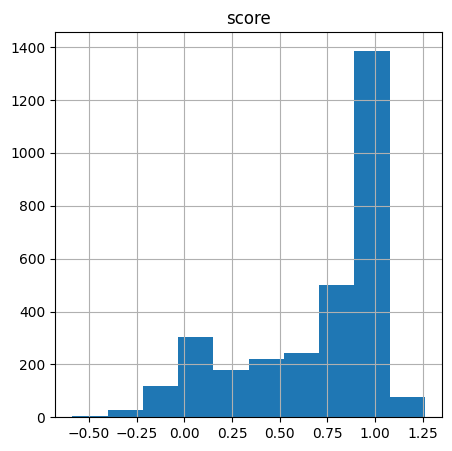

In [ ]:
tf.hist(figsize=(5, 5))

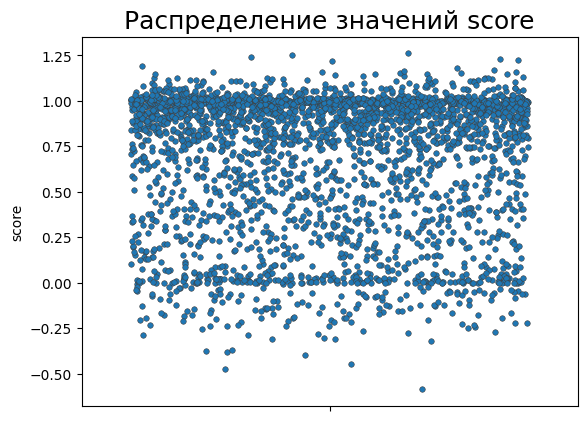

In [ ]:
import seaborn as sns
sns.stripplot(tf.score, jitter=0.4, size=4, linewidth=.4)

# Decorations
plt.title('Распределение значений score', fontsize=18)
plt.show()

In [ ]:
tf['subject.account.id'][tf['score']<0].count()

172

In [ ]:
tf['subject.account.id'][tf['score']==0].count()

20

In [ ]:
tf['subject.account.id'][tf['score']>0].count()

2868

# Evaluate

In [ ]:
def calc_mean_auc(training_set, altered_users, predictions, test_set):


    store_auc = [] # An empty list to store the AUC for each user that had an item removed from the training set
    popularity_auc = [] # To store popular AUC scores
    pop_items = np.array(test_set.sum(axis = 1)).reshape(-1) # Get sum of item iteractions to find most popular
    item_vecs = predictions[1]
    for user in altered_users: # Iterate through each user that had an item altered
        training_row = training_set[:,user].toarray().reshape(-1) # Get the training set row
        zero_inds = np.where(training_row == 0)
        # Get the predicted values based on our user/item vectors
        user_vec = predictions[0][user,:]
        #pred = user_vec.dot(item_vecs).toarray()[0,zero_inds].reshape(-1)
        pred = user_vec.reshape(1, -1).dot(item_vecs)[0, zero_inds].reshape(-1)
        # Get only the items that were originally zero
        # Select all ratings from the MF prediction for this user that originally had no iteraction
        actual = test_set[:,user].toarray()[zero_inds].reshape(-1)
        # Select the binarized yes/no interaction pairs from the original full data
        # that align with the same pairs in training
        pop = pop_items[zero_inds] # Get the item popularity for our chosen items
        store_auc.append(auc_score(pred, actual)) # Calculate AUC for the given user and store
        popularity_auc.append(auc_score(pop, actual)) # Calculate AUC using most popular and score
    # End users iteration

    return float('%.3f'%np.mean(store_auc)), float('%.3f'%np.mean(popularity_auc))
   # Return the mean AUC rounded to three decimal places for both test and popularity benchmark

In [ ]:
def auc_score(predictions, test):

    fpr, tpr, thresholds = metrics.roc_curve(test, predictions)
    return metrics.auc(fpr, tpr)

тест

In [ ]:
AS=df.loc[(df.loc[:,'subject.account.id']=='S-1-5-21-1023191730-727829927-3985050192-40333'),'src.asset'].value_counts()
AS

14a957b3-a6c0-0001-0000-0000000006b9    154
14765658-9940-0001-0000-000000000004      2
1457bbbb-4700-0001-0000-000000001219      2
147656e1-9fc0-0001-0000-000000000005      2
1457bbbf-d6c0-0001-0000-000000001326      1
1640c896-e1c0-0001-0000-000000000023      1
Name: src.asset, dtype: int64

In [ ]:
sdf=df['src.asset']
sdf=sdf.to_frame()
sdf=sdf.drop_duplicates()
sdf['src.asset']

0          1452d867-9840-0001-0000-00000000069b
1          165dc53b-cd40-0001-0000-0000000007ee
2                                            un
7          1457bbbb-5dc0-0001-0000-000000001226
11         14f070b5-de40-0001-0000-0000000000bd
                           ...                 
2172702    1457bbfd-5d00-0001-0000-0000000013fe
2207119    145620d0-c0c0-0001-0000-000000000f5f
2207681    16726841-c6c0-0001-0000-000000000cd7
2278812    14a5dcc1-9cc0-0001-0000-00000000066d
2283923    165c1c78-3bc0-0001-0000-00000000079b
Name: src.asset, Length: 1219, dtype: object

In [ ]:
model.similar_items(1)

(array([   1, 1106,    5,    0, 1105,  648,  844,    3, 1117,  948],
       dtype=int32),
 array([1.        , 0.99903786, 0.99903494, 0.99832505, 0.9978501 ,
        0.9906575 , 0.90062505, 0.81121266, 0.7910168 , 0.78720224],
       dtype=float32))

In [ ]:
model.similar_items(5)

(array([   5, 1106,    0, 1105,    1,  648,  844,    3, 1117,  948],
       dtype=int32),
 array([0.9999998 , 0.99996066, 0.9998473 , 0.99969614, 0.999035  ,
        0.9956154 , 0.8809351 , 0.81718636, 0.7641337 , 0.76068664],
       dtype=float32))

In [ ]:
user_factors = model.user_factors
item_factors = model.item_factors
print(user_factors)
print('_________________')
print(item_factors)


[[-1.3044342   3.657554   -0.45384842 ...  3.9942145  -1.4427428
   0.3935682 ]
 [-1.1335251   3.0963972  -0.41998225 ...  3.3211145  -1.1612052
   0.40024695]
 [-1.2738168   3.5606823  -0.44756532 ...  3.8793013  -1.3942341
   0.39109585]
 ...
 [-0.9627227   2.5885532  -0.35622248 ...  2.7619536  -0.96536523
   0.3596518 ]
 [-0.55187446  1.4749062  -0.20207189 ...  1.5729316  -0.5486441
   0.20681082]
 [-0.3442456   0.9162985  -0.12566164 ...  0.97611684 -0.34025073
   0.1306261 ]]
_________________
[[ 0.01708668  0.00604847  0.00323291 ...  0.00119469  0.00552365
   0.00111511]
 [ 0.01712359  0.0060195   0.00359683 ...  0.00125537  0.00602589
   0.00143875]
 [ 0.00487144  0.00412524 -0.00127004 ... -0.00121861  0.00820465
   0.0040972 ]
 ...
 [ 0.00432085  0.00139998  0.00237598 ...  0.00066355  0.00359088
   0.00196027]
 [ 0.00195166  0.0083801   0.00776064 ...  0.006648    0.00066529
   0.00899874]
 [ 0.00015682  0.01833812  0.0032744  ...  0.01994481 -0.00205342
   0.00561849]]


In [ ]:
AS

14a957b3-a6c0-0001-0000-0000000006b9    154
14765658-9940-0001-0000-000000000004      2
1457bbbb-4700-0001-0000-000000001219      2
147656e1-9fc0-0001-0000-000000000005      2
1457bbbf-d6c0-0001-0000-000000001326      1
1640c896-e1c0-0001-0000-000000000023      1
Name: src.asset, dtype: int64

In [ ]:
 vectorizer.categories_[1][154]

'1457bbb0-a100-0001-0000-000000001082'

In [ ]:
model.explain(1,apps_runs_sparse,99)

(-0.005979652266875213,
 [(1218, -0.005979652266875213)],
 (array([[ 0.30305244,  0.06242665,  0.11113763, ...,  0.04948023,
           0.15775755,  0.07512665],
         [ 0.01891855,  0.20784698,  0.0309586 , ...,  0.01547563,
           0.02318364,  0.03537923],
         [ 0.03368053,  0.0133726 ,  0.20388737, ...,  0.03351589,
           0.03916269,  0.02944335],
         ...,
         [ 0.0149951 ,  0.00630545,  0.01281168, ...,  0.18085678,
           0.00405502,  0.00282704],
         [ 0.04780881,  0.01466693,  0.02623531, ...,  0.00719934,
           0.19143275, -0.00340338],
         [ 0.02276732,  0.01204337,  0.01544782, ...,  0.00505172,
           0.02166737,  0.18160161]]),
  False))

In [ ]:
get_app_by_id(1200)

'167e1c7f-6240-0001-0000-000000000f8a'

In [ ]:
get_similar_apps('1457bbbb-0c00-0001-0000-0000000011f2', 3)

<class 'list'>
[(330, 527, 385), (1.0000001, 0.9999178, 0.99991566)]


[('1457bbbb-0c00-0001-0000-0000000011f2', 527),
 ('1452d83f-c5c0-0001-0000-0000000004cc', 0.9999178)]

# Поиск аномалий


In [ ]:
tf

,subject.account.id,src.asset,score
0,S-1-5-21-1023191730-727829927-3985050192-22786,1457bbb5-c440-0001-0000-0000000010de,0.999335
1,S-1-5-21-1023191730-727829927-3985050192-32035,165dc53b-cd40-0001-0000-0000000007ee,0.999786
2,S-1-5-21-1023191730-727829927-3985050192-40118,1457bbff-21c0-0001-0000-00000000147a,0.996264
11,S-1-5-21-1023191730-727829927-3985050192-3408,1457bbaf-7880-0001-0000-00000000100e,0.998475
13,S-1-5-21-1023191730-727829927-3985050192-36261,1457bbbb-e4c0-0001-0000-00000000127b,0.999462
...,...,...,...
577611,S-1-5-21-1023191730-727829927-3985050192-24126,1457bbbf-d6c0-0001-0000-000000001326,0.087383
577700,S-1-5-21-1023191730-727829927-3985050192-27031,147656e1-9fc0-0001-0000-000000000005,1.045987
579689,S-1-5-21-1023191730-727829927-3985050192-40333,1640c896-e1c0-0001-0000-000000000023,1.219877
579989,S-1-5-21-1023191730-727829927-3985050192-46656,16531e52-8580-0001-0000-0000000004b4,0.013471


In [ ]:
mean_rating = tf['score'].mean()
print(mean_rating)

0.6965434587654992


In [ ]:
# вычисление стандартного отклонения рейтинга по всей выборке
std_rating = tf['score'].std()
std_rating

0.3752943465259535

In [ ]:
# вычисление Z-оценки для каждого пользователя
user_z_scores = {}
for user_id, user_asset in set(zip(tf['subject.account.id'], tf['src.asset'])):
    user_data = tf[(tf['subject.account.id'] == user_id) & (tf['src.asset'] == user_asset)]
    user_mean = user_data['score'].mean()
    user_std = user_data['score'].std()
    z_score = (user_mean - mean_rating) / std_rating
    user_z_scores[(user_id, user_asset)] = z_score

In [ ]:
user_z_scores = {}
for user_id in set(tf['subject.account.id']):
    user_data = tf[tf['subject.account.id'] == user_id]
    user_mean = user_data['score'].mean()
    user_std = user_data['score'].std()
    z_score = (user_mean - mean_rating) / std_rating
    user_z_scores[user_id] = z_score

In [ ]:
# определение аномальных пользователей
anomalies = []
for user_id, z_score in user_z_scores.items():
    if abs(z_score) > 3: # если значение Z-оценки больше 4 (или меньше -4), то считаем пользователя аномальным
        anomalies.append(user_id)

print('Аномальные пользователи:', anomalies)

Аномальные пользователи: [('S-1-5-21-1023191730-727829927-3985050192-41331', '1640c896-e1c0-0001-0000-000000000023'), ('S-1-5-21-1023191730-727829927-3985050192-40413', '147656e1-9fc0-0001-0000-000000000005'), ('S-1-5-21-1023191730-727829927-3985050192-3447', '1457bbbb-45c0-0001-0000-000000001218')]


In [ ]:
anomalies

[('S-1-5-21-1023191730-727829927-3985050192-41331',
  '1640c896-e1c0-0001-0000-000000000023'),
 ('S-1-5-21-1023191730-727829927-3985050192-40413',
  '147656e1-9fc0-0001-0000-000000000005'),
 ('S-1-5-21-1023191730-727829927-3985050192-3447',
  '1457bbbb-45c0-0001-0000-000000001218')]

In [ ]:
tf1

In [ ]:
anml_tf = tf.loc[(tf['subject.account.id'] == 'S-1-5-21-1023191730-727829927-3985050192-3447') & (tf['src.asset'] == '1457bbbb-45c0-0001-0000-000000001218')]
anml_tf

,subject.account.id,src.asset,score
315422,S-1-5-21-1023191730-727829927-3985050192-3447,1457bbbb-45c0-0001-0000-000000001218,-0.586635


In [ ]:
a_tf = tf1.loc[(tf1['subject.account.id'] == 'S-1-5-21-1023191730-727829927-3985050192-3447') & (tf1['src.asset'] == '1457bbbb-45c0-0001-0000-000000001218')]
a_tf

,Unnamed: 0,object.storage.id,object.storage.name,src.ip,subject.account.id,subject.account.domain,event_src.host,src.asset,datafield6,time
315422,144908,,,10.10.52.126,S-1-5-21-1023191730-727829927-3985050192-3447,ptsecurity.ru,dc1-mail-03.ptsecurity.ru,1457bbbb-45c0-0001-0000-000000001218,NetworkCleartext,2022-03-16 04:49:19+00:00


In [ ]:
a_tf['time'] = pd.to_datetime(a_tf['time'])
a_tf["dp"] = pd.to_datetime(a_tf['time'],unit='s').apply(lambda x: "Day" if x.hour >= 10 and x.hour <= 18 else 'Morning'  if x.hour>=6 and x.hour<=10 else 'Evening'  if x.hour>=18 and x.hour<=22 else "Night")
a_tf=a_tf.drop(columns=['time'])
a_tf

,Unnamed: 0,object.storage.id,object.storage.name,src.ip,subject.account.id,subject.account.domain,event_src.host,src.asset,datafield6,dp
315422,144908,,,10.10.52.126,S-1-5-21-1023191730-727829927-3985050192-3447,ptsecurity.ru,dc1-mail-03.ptsecurity.ru,1457bbbb-45c0-0001-0000-000000001218,NetworkCleartext,Night


In [ ]:
# Вычисляем предсказания модели ALS
user_vecs, item_vecs = model.user_factors, model.item_factors
predictions = np.dot(user_vecs, item_vecs.T)

In [ ]:
tf1.loc[(tf1['datafield6'] == 'NetworkCleartext') & (tf1['src.asset'] == '1640c896-e1c0-0001-0000-000000000023')]


,Unnamed: 0,object.storage.id,object.storage.name,src.ip,subject.account.id,subject.account.domain,event_src.host,src.asset,datafield6,time
993,159084,,,10.10.52.126,S-1-5-21-1023191730-727829927-3985050192-41995,ptsecurity.ru,dc1-mail-05.ptsecurity.ru,1640c896-e1c0-0001-0000-000000000023,NetworkCleartext,2022-03-16 05:24:12+00:00
8544,20654,,,,S-1-5-21-1023191730-727829927-3985050192-41474,ptsecurity,dc1-mail-05.ptsecurity.ru,1640c896-e1c0-0001-0000-000000000023,NetworkCleartext,2022-03-16 00:45:33+00:00
8944,32234,,,10.10.52.126,S-1-5-21-1023191730-727829927-3985050192-26876,ptsecurity.ru,dc1-mail-05.ptsecurity.ru,1640c896-e1c0-0001-0000-000000000023,NetworkCleartext,2022-03-16 01:31:26+00:00
10017,14585,,,,S-1-5-21-1023191730-727829927-3985050192-45639,ptsecurity,dc1-mail-05.ptsecurity.ru,1640c896-e1c0-0001-0000-000000000023,NetworkCleartext,2022-03-16 00:18:32+00:00
10480,138544,,,10.10.52.126,S-1-5-21-1023191730-727829927-3985050192-37188,ptsecurity.ru,dc1-mail-05.ptsecurity.ru,1640c896-e1c0-0001-0000-000000000023,NetworkCleartext,2022-03-16 05:17:39+00:00
...,...,...,...,...,...,...,...,...,...,...
574073,32759,,,,S-1-5-21-1023191730-727829927-3985050192-41481,ptsecurity,dc1-mail-05.ptsecurity.ru,1640c896-e1c0-0001-0000-000000000023,NetworkCleartext,2022-03-16 01:04:45+00:00
575813,111993,,,10.10.52.126,S-1-5-21-1023191730-727829927-3985050192-1130,ptsecurity.ru,dc1-mail-05.ptsecurity.ru,1640c896-e1c0-0001-0000-000000000023,NetworkCleartext,2022-03-16 04:00:30+00:00
578652,17193,,,,S-1-5-21-1023191730-727829927-3985050192-41516,ptsecurity,dc1-mail-05.ptsecurity.ru,1640c896-e1c0-0001-0000-000000000023,NetworkCleartext,2022-03-16 00:03:32+00:00
579689,7384,,,10.10.52.126,S-1-5-21-1023191730-727829927-3985050192-40333,ptsecurity.ru,dc1-mail-05.ptsecurity.ru,1640c896-e1c0-0001-0000-000000000023,NetworkCleartext,2022-03-16 00:08:19+00:00


In [ ]:
predictions


array([[ 0.01046591,  0.00950283, -0.00949078, ..., -0.00796721,
         0.01324301,  1.0232415 ],
       [ 0.00978138,  0.00893983, -0.00705938, ..., -0.00646052,
         0.01269086,  0.84020317],
       [ 0.01033778,  0.00939588, -0.00907433, ..., -0.00770829,
         0.01315325,  0.9916454 ],
       ...,
       [ 0.00825947,  0.00756401, -0.00560943, ..., -0.00535644,
         0.01087169,  0.6870333 ],
       [ 0.00457022,  0.00418758, -0.00309598, ..., -0.00294725,
         0.00599649,  0.37736103],
       [ 0.00282143,  0.00258682, -0.00187385, ..., -0.00180181,
         0.00371231,  0.23036745]], dtype=float32)

In [ ]:
# Выбираем пользователей, для которых нужно вычислить AUC
altered_users = [1, 100, 200]

In [ ]:
for_rec_df=df
vectorizer = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)
encoded_df = pd.DataFrame(vectorizer.fit_transform(for_rec_df))
encoded_df.columns = ['uid','iid']
encoded_df.info()
encoded_df['quantity'] = 1
grouped_purchased = encoded_df.groupby(['uid','iid']).sum().reset_index()
grouped_purchased

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2323401 entries, 0 to 2323400
Data columns (total 2 columns):
 #   Column  Dtype  
---  ------  -----  
 0   uid     float64
 1   iid     float64
dtypes: float64(2)
memory usage: 35.5 MB


,uid,iid,quantity
0,0.0,1218.0,9038
1,1.0,1218.0,16
2,2.0,1218.0,107
3,3.0,1218.0,1
4,4.0,403.0,1
...,...,...,...
5660,1491.0,1218.0,1
5661,1492.0,1218.0,2
5662,1493.0,1218.0,7
5663,1494.0,1218.0,2


In [ ]:
2or_rec_tf=tf1
vectorizer = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)
encoded_tf = pd.DataFrame(vectorizer.fit_transform(for_rec_tf))
encoded_tf.columns = ['uid','iid']
encoded_tf.info()
encoded_tf['quantity'] = 1
grouped_tf = encoded_tf.groupby(['uid','iid']).sum().reset_index()
grouped_tf

ValueError: ignored

In [ ]:
customers = list(np.sort(grouped_tf.uid.unique())) # Get our unique customers
products = list(grouped_tf.iid.unique()) # Get our unique products that were purchased
quantity = list(grouped_tf.quantity) # All of our purchases

rows = grouped_tf.uid.astype('category').cat.codes
# Get the associated row indices
cols = grouped_tf.iid.astype('category').cat.codes
# Get the associated column indices
test_sparse = sparse.csr_matrix((quantity, (rows,cols)), shape=( len(customers),len(products)))

In [ ]:
test_sparse.toarray()


In [ ]:
def calc_mean_auc(training_set, altered_users, predictions, test_set):


    store_auc = [] # An empty list to store the AUC for each user that had an item removed from the training set
    popularity_auc = [] # To store popular AUC scores
    pop_items = np.array(test_set.sum(axis = 1)).reshape(-1) # Get sum of item iteractions to find most popular
    item_vecs = predictions[1]
    for user in altered_users: # Итерация по каждому пользователю, у которого был изменен элемент
        training_row = training_set[:,user].toarray().reshape(-1) # Получить строку тренировочного набора
        zero_inds = np.where(training_row == 0)
        # Получить предсказанные значения на основе наших векторов пользователя/элемента
        user_vec = predictions[0][:].reshape(1, -1)
        #user_vec = np.array(user_vec, ndmin=2)
        pred = user_vec.dot(item_vecs).toarray()[0,zero_inds].reshape(-1)
        #pred = user_vec.reshape(1, -1).dot(item_vecs)[0, zero_inds].reshape(-1)
        # Получить только те элементы, которые изначально были нулевыми
         # Выберите все рейтинги из прогноза MF для этого пользователя, которые изначально не имели итерации
        actual = test_set[:,user].toarray()[zero_inds].reshape(-1)
        # Выберите бинаризованные пары взаимодействия да/нет из исходных полных данных
         # которые совпадают с теми же парами в обучении
        pop = pop_items[zero_inds] # Get the item popularity for our chosen items
        store_auc.append(auc_score(pred, actual)) # Calculate AUC for the given user and store
        popularity_auc.append(auc_score(pop, actual)) # Calculate AUC using most popular and score
    # End users iteration

    return float('%.3f'%np.mean(store_auc)), float('%.3f'%np.mean(popularity_auc))
   # Return the mean AUC rounded to three decimal places for both test and popularity benchmark

In [ ]:
zero_inds = np.where(training_row == 0)
zero_inds = zero_inds[0].astype(np.int64)
zero_inds

In [ ]:
user_vec = predictions[1][:]
user_vec

In [ ]:
# Вычисляем AUC для выбранных пользователей
mean_auc= calc_mean_auc(apps_runs_sparse, altered_users, predictions, test_sparse)

In [ ]:
predictions[1][3]

In [ ]:
user_vecs.shape

In [ ]:
apps_runs_sparse.toarray()

In [ ]:
predictions

In [ ]:
test_sparse.shape

In [ ]:
def auc_score(predictions, test):

    fpr, tpr, thresholds = metrics.roc_curve(test, predictions)
    return metrics.auc(fpr, tpr)

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

def calc_auc(test_set, predictions):
    sim_mat = apps_runs_sparse.T.dot(predictions)
    auc_scores = []
    for i in range(sim_mat.shape[1]):
        true_scores = []
        predicted_scores = []
        for j in range(sim_mat.shape[0]):
            if apps_runs_sparse[j, i] > 0:
                true_scores.append(1)
            else:
                true_scores.append(0)
            predicted_scores.append(sim_mat[j, i])
        fpr, tpr, _ = roc_curve(true_scores, predicted_scores)
        print(fpr, tpr)
        auc_score = roc_auc_score(true_scores, predicted_scores)
        auc_scores.append(auc_score)
        plt.plot(fpr, tpr, label='Item %d (AUC = %0.2f)' % (i, auc_score))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.title('ROC Curve')
    plt.show()
    mean_auc = sum(auc_scores) / float(len(auc_scores))
    return mean_auc

In [ ]:
calc_auc(apps_runs_sparse, predictions)

In [ ]:

# Вычисляем метрику AUC для тестовой выборки и набора предсказаний
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(apps_runs_sparse.toarray(), predictions)

# Выводим результат расчета метрики AUC
print("AUC score:", auc_score)

In [ ]:
from implicit.evaluation import precision_at_k

In [ ]:
k = 10 # число рекомендаций
precision = precision_at_k(model, tf, k=k)


# новый

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
tf

In [ ]:
pca = PCA(n_components=2)
pca.fit(tf)
transformed_data = pca.transform(tf)